
<div class="alert alert-block alert-info"><font size="5"><center><b><u>Sprint6_Tasca mètodes de mostreig
   </u></b></center></font>
\begin{align*}Marc\:Breysse\end{align*}

<span style=color:blue>*Aprèn a realitzar mostreig de les dades amb Python*</span>

https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.</span>

 #### <span style=color:green><ins> Mostra aleatòria simple de 100 mostres  </ins></span>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import timeit
import random

In [2]:
#pd.read_csv('Web_access_log-akumenius.com.txt', sep='delimiter', header=None, engine='python')

Mlb = pd.read_csv('MLB.txt', sep='\t', encoding='utf-8')

In [3]:
Mlb.shape

(828, 4)

In [4]:
Mlb.columns

Index(['player', 'team', 'position', 'salary'], dtype='object')

In [5]:
Mlb.head(7)

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0
6,Chris B. Young,Arizona Diamondbacks,Outfielder,3450.0


In [6]:
random.seed(6)
k = 100
MlbSampleSimple = Mlb.sample(k)
MlbSampleSimple.shape

(100, 4)

<span style=color:blue><b><em>In case of Numpy array</em></b></span>

- <span style=color:blue>population = [2,5,7,8,9]</span> 
- <span style=color:blue>k = 2</span> 
- <span style=color:blue>random.sample(population, k)</span> 

In [7]:
MlbSampleSimple

,player,team,position,salary
646,Guillermo Mota,San Francisco Giants,Pitcher,750.0
202,Justin Masterson,Cleveland Indians,Pitcher,427.0
451,Jesse Crain,Minnesota Twins,Pitcher,2000.0
397,Brad Ausmus,Los Angeles Dodgers,Catcher,850.0
430,Casey McGehee,Milwaukee Brewers,Third Baseman,427.5
...,...,...,...,...
661,Cliff Lee,Seattle Mariners,Pitcher,9000.0
146,J.J. Putz,Chicago White Sox,Pitcher,3000.0
114,Ted Lilly,Chicago Cubs,Pitcher,13000.0
356,Scott Kazmir,Los Angeles Angeles,Pitcher,8000.0


In [8]:
MlbSampleSimple.sort_index()

,player,team,position,salary
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
21,Gerardo Parra,Arizona Diamondbacks,Outfielder,405.5
28,Tim Hudson,Atlanta Braves,Pitcher,9000.0
37,Troy Glaus,Atlanta Braves,First Baseman,1750.0
40,Eric Hinske,Atlanta Braves,First Baseman,1000.0
...,...,...,...,...
775,Jose A. Bautista,Toronto Blue Jays,Third Baseman,2400.0
780,Shawn Camp,Toronto Blue Jays,Pitcher,1150.0
785,Adam Lind,Toronto Blue Jays,Designated Hitter,550.0
797,Mike McCoy,Toronto Blue Jays,Second Baseman,400.7


 #### <span style=color:green><ins> Mostra sistemàtica cada 6 files  </ins></span>
 https://www.statology.org/systematic-sampling-in-pandas/

In [9]:
sys_sample_Mlb = Mlb.iloc[::6]
sys_sample_Mlb

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
6,Chris B. Young,Arizona Diamondbacks,Outfielder,3450.0
12,Miguel Montero,Arizona Diamondbacks,Catcher,2000.0
18,Juan C. Gutierrez,Arizona Diamondbacks,Pitcher,411.0
24,Rusty Ryal,Arizona Diamondbacks,Third Baseman,401.0
...,...,...,...,...
798,Adam Dunn,Washington Nationals,First Baseman,12000.0
804,Ivan Rodriguez,Washington Nationals,Catcher,3000.0
810,Sean Burnett,Washington Nationals,Pitcher,775.0
816,John Lannan,Washington Nationals,Pitcher,458.0


# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).</span>

 #### <span style=color:green><ins> Mostra estratificada de 100 mostres (12% de cada posición existent) </ins></span>

In [10]:
MlbStratified = Mlb.groupby('position', group_keys = True).apply(pd.DataFrame.sample, frac=.120)
MlbStratified.head(15)

player                   team  \
position                                                        
Catcher           96     Jason Varitek         Boston Red Sox   
                  598  Jason Jaramillo     Pittsburgh Pirates   
                  581      Ryan Doumit     Pittsburgh Pirates   
                  433  George Kottaras      Milwaukee Brewers   
                  812     Jesus Flores   Washington Nationals   
                  569  Brian Schneider  Philadelphia Phillies   
                  397      Brad Ausmus    Los Angeles Dodgers   
                  622     Nick Hundley       San Diego Padres   
Designated Hitter 453        Jim Thome        Minnesota Twins   
First Baseman     193  Russell Branyan      Cleveland Indians   
                  208       Andy Marte      Cleveland Indians   
                  642      Aubrey Huff   San Francisco Giants   
                  4       Adam LaRoche   Arizona Diamondbacks   
                  137     Paul Konerko      Chicago White Sox   
Outfielder        266        Don Kelly         Detroit Tigers   

                                position   salary  
position                                           
Catcher           96             Catcher   3000.0  
                  598            Catcher    416.5  
                  581            Catcher   3650.0  
                  433            Catcher    408.5  
                  812            Catcher    750.0  
                  569            Catcher   1125.0  
                  397            Catcher    850.0  
                  622            Catcher    415.7  
Designated Hitter 453  Designated Hitter   1500.0  
First Baseman     193      First Baseman   1500.0  
                  208      First Baseman    413.4  
                  642      First Baseman   3000.0  
                  4        First Baseman   4500.0  
                  137      First Baseman  12000.0  
Outfielder        266         Outfielder    405.0

In [11]:
MlbStratified.shape

(100, 4)

<span style=color:green><ins> Mostra estratificada de 100 mostres amb "Train-Test" </ins></span>

https://www.w3schools.com/python/python_ml_train_test.asp

In [12]:
from sklearn.model_selection import train_test_split
Mlb_train, Mlb_test = train_test_split(Mlb, test_size=100, stratify = Mlb['position'])

In [13]:
Mlb_test.sort_index()

,player,team,position,salary
7,Stephen Drew,Arizona Diamondbacks,Shortstop,3400.000
16,Justin Upton,Arizona Diamondbacks,Outfielder,708.333
17,Rodrigo Lopez,Arizona Diamondbacks,Pitcher,650.000
24,Rusty Ryal,Arizona Diamondbacks,Third Baseman,401.000
46,Jesse Chavez,Atlanta Braves,Pitcher,415.000
...,...,...,...,...
808,Adam Kennedy,Washington Nationals,Second Baseman,1250.000
809,Miguel Batista,Washington Nationals,Pitcher,1000.000
819,Garrett Mock,Washington Nationals,Pitcher,411.000
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.000


 #### <span style=color:green><ins> Mostra SMOTE (Synthetic Minority Oversampling Technique)  </ins></span>
 https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7

https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

In [14]:
### count positions
Mlb.set_index(["position","team"]).count(level="position")

,player,salary
position,,
Catcher,67,67
Designated Hitter,7,7
First Baseman,42,42
Infielder,4,4
Outfielder,148,148
Pitcher,410,410
Second Baseman,48,48
Shortstop,56,56
Third Baseman,46,46


#### <span style=color:green><ins> Designated Hitler and Infielder categories have very few samples....Let's oversample  </ins></span>

<span style=color:green><ins> Data preparation to get read of textual data  </ins></span>

In [15]:
# Remap to integers: N/A since no variables with 2 outputs

# Create dummy variables
dummy_position_type = pd.get_dummies(Mlb['position'], prefix='position', drop_first=True)

# Drop unnecessary columns
to_drop = ['player', 'team', 'position']
Mlb.drop(to_drop, axis=1, inplace=True)

# Add new random column
Mlb['randNumCol'] = np.random.randint(0,10000, size=len(Mlb))

# Merge into a single data frame
merged = pd.concat([Mlb, dummy_position_type], axis=1)
merged.head()

,salary,randNumCol,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
0,8500.0,4627,0,0,0,0,1,0,0,0
1,8250.0,1068,0,0,0,0,1,0,0,0
2,5250.0,37,0,0,0,0,0,0,0,0
3,4600.0,5704,0,0,0,0,1,0,0,0
4,4500.0,9098,0,1,0,0,0,0,0,0


In [16]:
merged.shape

(828, 10)

In [22]:
merged_r = merged[['salary', 'randNumCol','position_Shortstop']]
merged_r.head()

,salary,randNumCol,position_Shortstop
0,8500.0,4627,0
1,8250.0,1068,0
2,5250.0,37,0
3,4600.0,5704,0
4,4500.0,9098,0


<AxesSubplot:xlabel='salary', ylabel='randNumCol'>

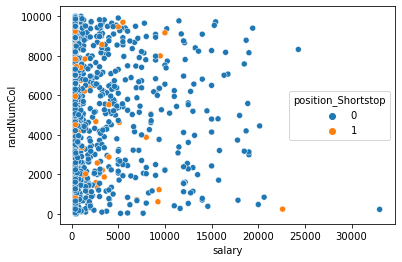

In [23]:
sns.scatterplot(data = merged_r, x ='salary', y = 'randNumCol', hue = 'position_Shortstop')

<span style=color:green><ins> Smote  </ins></span>

In [24]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

#Oversampling the data
smote = SMOTE(random_state = 101)

X, y = smote.fit_resample(merged[['salary', 'randNumCol']], merged['position_Shortstop'])

#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['salary', 'randNumCol'])
df_oversampler['position_Shortstop']

KeyError: 'position_Shortstop'

# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling</span>

https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c

In [25]:
Mlb = pd.read_csv('MLB.txt', sep='\t', encoding='utf-8')
Mlb.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


<span style=color:green><ins> Dataframe to array  </ins></span>

In [27]:
stream = Mlb.to_numpy()

<span style=color:green><ins> Reservoir sampling  </ins></span>

In [38]:
# Doing Reservoir Sampling from the stream
k=3
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element
print(reservoir)

[array(['Jason Giambi', 'Colorado Rockies', 'First Baseman', 1750.0],
      dtype=object), array(['Joe Mauer', 'Minnesota Twins', 'Catcher', 12500.0], dtype=object), array(['Brad Penny', 'St. Louis Cardinals', 'Pitcher', 7500.0],
      dtype=object)]


In [39]:
reservoir_df = pd.DataFrame(data=reservoir, columns=["player", "team","position", "salary"])
reservoir_df.head()

,player,team,position,salary
0,Jason Giambi,Colorado Rockies,First Baseman,1750.0
1,Joe Mauer,Minnesota Twins,Catcher,12500.0
2,Brad Penny,St. Louis Cardinals,Pitcher,7500.0
